**Objective of this Project:**

Goal of This project using sql would be identify the opportunities to increase the occupancy rate on low-performing flights, which utlimately help airlines to gain profit.

In [ ]:
#  Importing libraries

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset can be found of kaggle: https://www.kaggle.com/datasets/rohanshahabaje/travel

In [ ]:
#  Database connection

connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [ ]:
cursor.execute("select name from sqlite_master where type = 'table';")

print("List of all tables present in the database:")

table_list = [table[0] for table in cursor.fetchall()]

table_list

List of all tables present in the database:


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
#  Data Exploration

aircrafts_data = pd.read_sql_query('select * from aircrafts_data',connection)
aircrafts_data.head(10)

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [ ]:
aircrafts_data.shape

(9, 3)

In [ ]:
airports_data = pd.read_sql_query('select * from airports_data',connection)
airports_data.head(10)

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
5,VVO,"{""en"": ""Vladivostok International Airport"", ""r...","{""en"": ""Vladivostok"", ""ru"": ""Владивосток""}","(132.147994995117188,43.3989982604980469)",Asia/Vladivostok
6,LED,"{""en"": ""Pulkovo Airport"", ""ru"": ""Пулково""}","{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}","(30.2625007629394531,59.8003005981445312)",Europe/Moscow
7,KGD,"{""en"": ""Khrabrovo Airport"", ""ru"": ""Храброво""}","{""en"": ""Kaliningrad"", ""ru"": ""Калининград""}","(20.5925998687744141,54.8899993896484375)",Europe/Kaliningrad
8,KEJ,"{""en"": ""Kemerovo Airport"", ""ru"": ""Кемерово""}","{""en"": ""Kemorovo"", ""ru"": ""Кемерово""}","(86.1072006225585938,55.2700996398925781)",Asia/Novokuznetsk
9,CEK,"{""en"": ""Chelyabinsk Balandino Airport"", ""ru"": ...","{""en"": ""Chelyabinsk"", ""ru"": ""Челябинск""}","(61.503300000000003,55.3058010000000024)",Asia/Yekaterinburg


In [ ]:
airports_data.shape

(104, 5)

In [ ]:
boarding_passes = pd.read_sql_query('select * from boarding_passes',connection)
boarding_passes.head(10)

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
5,0005435212360,30625,6,11E
6,0005435212393,30625,7,11H
7,0005435212374,30625,8,12E
8,0005435212365,30625,9,13D
9,0005435212378,30625,10,14H


In [ ]:
boarding_passes.shape

(579686, 4)

In [ ]:
bookings = pd.read_sql_query('select * from bookings',connection)
bookings.head(10)

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
5,0002DB,2017-07-29 06:30:00+03,101500
6,0002E0,2017-07-11 16:09:00+03,89600
7,0002F3,2017-07-10 05:31:00+03,69600
8,00034E,2017-08-04 16:52:00+03,73300
9,000352,2017-07-06 02:02:00+03,109500


In [ ]:
flights = pd.read_sql_query('select * from flights',connection)
flights.head(10)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
5,7784,PG0667,2017-09-10 15:00:00+03,2017-09-10 17:30:00+03,SVO,KRO,Scheduled,CR2,\N,\N
6,9478,PG0360,2017-08-28 09:00:00+03,2017-08-28 11:35:00+03,LED,REN,Scheduled,CR2,\N,\N
7,11085,PG0569,2017-08-24 15:05:00+03,2017-08-24 16:10:00+03,SVX,SCW,Scheduled,733,\N,\N
8,11847,PG0498,2017-09-12 10:15:00+03,2017-09-12 14:55:00+03,KZN,IKT,Scheduled,319,\N,\N
9,12012,PG0621,2017-08-26 16:05:00+03,2017-08-26 17:00:00+03,KZN,MQF,Scheduled,CR2,\N,\N


In [ ]:
flights.shape

(33121, 10)

In [ ]:
seats = pd.read_sql_query('select * from seats',connection)
seats.head(10)

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
5,319,3C,Business
6,319,3D,Business
7,319,3F,Business
8,319,4A,Business
9,319,4C,Business


In [ ]:
seats.head(10)

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
5,319,3C,Business
6,319,3D,Business
7,319,3F,Business
8,319,4A,Business
9,319,4C,Business


In [ ]:
ticket_flights = pd.read_sql_query('select * from ticket_flights',connection)
ticket_flights.head(10)

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
5,0005435212357,30625,Comfort,23900
6,0005435212360,30625,Comfort,23900
7,0005435212393,30625,Comfort,23900
8,0005435212374,30625,Comfort,23900
9,0005435212365,30625,Comfort,23900


In [ ]:
ticket_flights.shape

(1045726, 4)

In [ ]:
tickets = pd.read_sql_query('select * from tickets',connection)
tickets.head(10)

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
5,0005432000992,F313DD,2021 652719
6,0005432000993,F313DD,0817 363231
7,0005432000994,CCC5CB,2883 989356
8,0005432000995,CCC5CB,3097 995546
9,0005432000996,1FB1E4,6866 920231


In [ ]:
tickets.shape

(366733, 3)

In [ ]:
for table in table_list:
  print("\n table name:",table)
  column_info = connection.execute("PRAGMA table_info({})".format(table))
  for column in column_info.fetchall():
    print(column[1:3])




 table name: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

 table name: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

 table name: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

 table name: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

 table name: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

 table name: seats
('aircraft_code', 'character(3

In [ ]:
for table in table_list:
  print("\n table name:",table)
  df_table = pd.read_sql_query(f"select * from {table} ",connection)
  print(df_table.isnull().sum())


 table name: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 table name: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 table name: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 table name: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 table name: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 table name: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 table name: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 table name: tickets
ticket_no       0
book_ref        0
pass

In [ ]:
# How many planes have more than 100 seats.

pd.read_sql_query("select aircraft_code, count(*) as num_seats from seats group by aircraft_code having num_seats >100",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


**Insights1: The basic analysis of data provides insights into the number of planes with more than 100 seats, how the number of tickets booked and total amount earned changed over time, and also average fare for each aircraft with strategies to increase occupancy rates and optimize pricing for each aircraft.**

In [ ]:
#  How many number of tickets booked and total amount earned changed with the time.
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [ ]:
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [ ]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref = bookings.book_ref """,connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


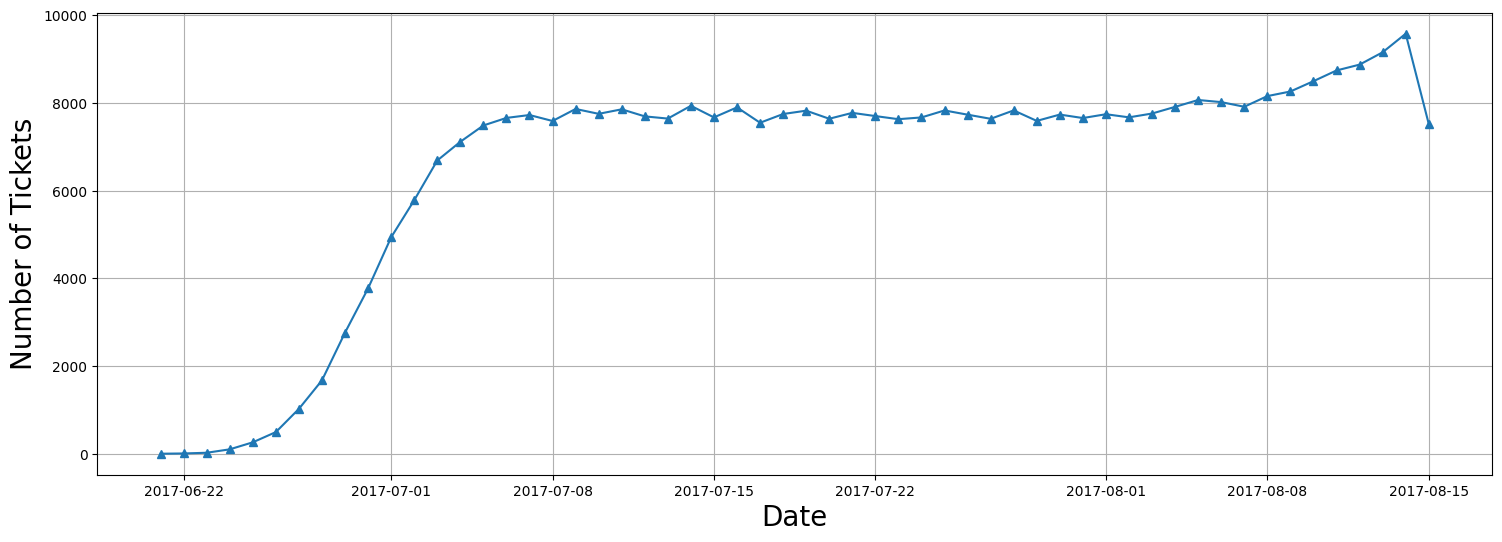

In [ ]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index, x['date'],marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

Insights2: In order to gain a deeper understanding of the trend of ticket bookings and revenue earned through those bookings, I have utilized a line chart visualization. After analyzing char, it's observed that number of tickets booked exhibits a gradual increase from June 22nd to July7th, followed by a relatively stable pattern from July8th until August, with a noticeable peak in ticket bookings where the highest number of tickets were booked on a single day.

It's noticeable that revenue earned by the company from these bookings is closely tied to the number of tickets booked. **bold text** **bold text** **bold text**

In [ ]:
bookings  = pd.read_sql_query("""select * from bookings""",connection)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [ ]:
y = bookings.groupby('date')[['total_amount']].sum()
y

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


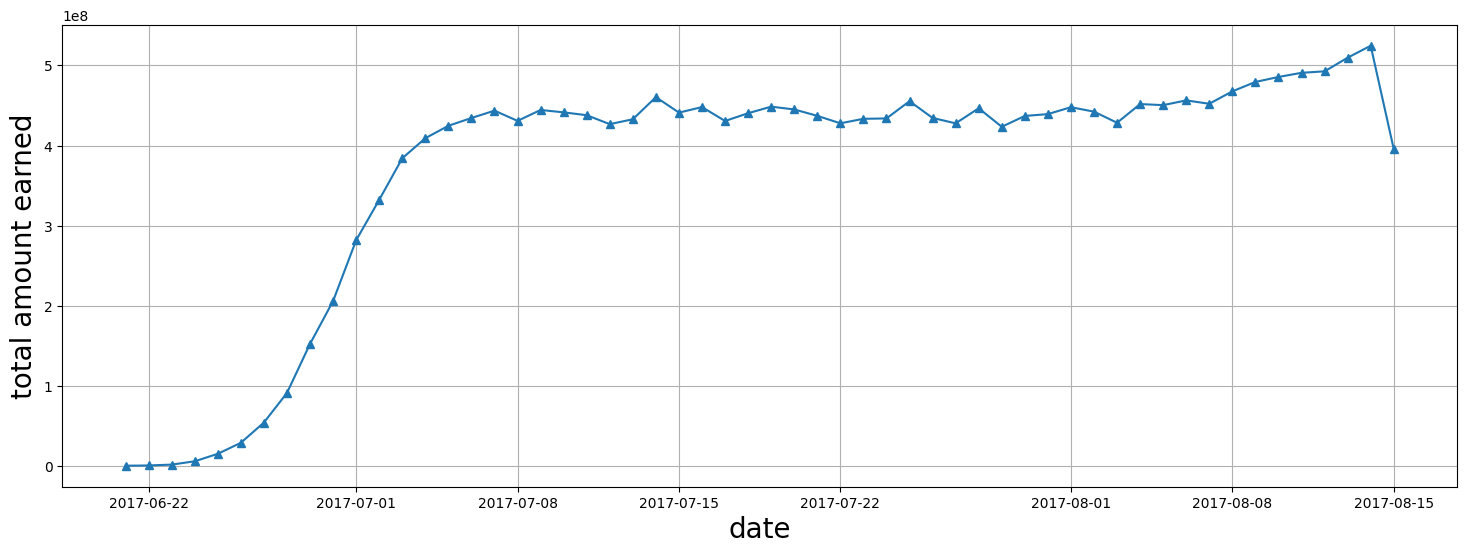

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(y.index,y['total_amount'],marker='^')
plt.xlabel('date', fontsize= 20)
plt.ylabel('total amount earned', fontsize=20)
plt.grid('b')
plt.show()

In [ ]:
#  Calculate the average charges for each aircraft with different fare conditions.

table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) from ticket_flights inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code, fare_conditions """,connection)
df.head()

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

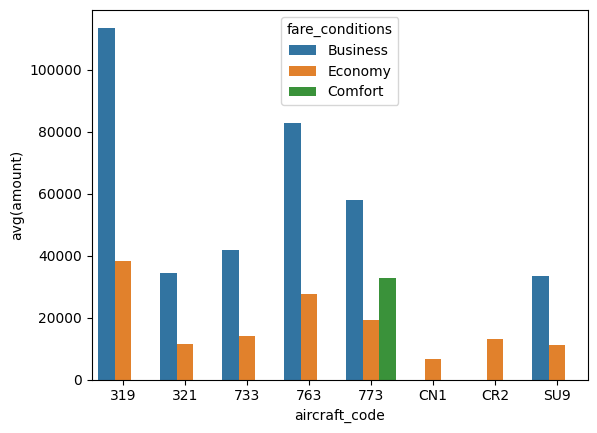

In [ ]:
import seaborn as sns
sns.barplot(data = df, x= 'aircraft_code' , y='avg(amount)', hue = 'fare_conditions')

**Insights 3: By looking at above bar graph, graph shows data for three types of fares: business, economy, and comfort. Also comfort class is only available on aircraft 773. On the other hand, CN1 and CR2 planes only provide the economy class. Furthermore, when pricing circumstances with each aircraft are compared, the charges for business class are consistently greater than those for economy class. This trend may be seen across all planes, regardless of fare conditions.**

In [ ]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
#  analyzing occupancy rate

#  For each aircraft, calculate total revenue per year and average revenue per ticket.

pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue, total_revenue/ticket_count as avg_revenue_per_ticket from (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code) """,connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


**Insights 4:Airlines must thoroughly analyze their revenue streams in order to maximize profitability. The overall income per year and average revenue per ticket for each aircraft are important metrics to consider. Also, airlines may use this information to determine which aircraft types and itineraries generate the most income and alter their operations appropriately. Also by this research can be used to indentify potential for pricing optimization and allocating resources to more profitable routes.**

In [ ]:
#  calculate the average occupancy per aircraft

flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [ ]:
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [ ]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate
from
  (
     select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
     inner join flights
     on boarding_passes.flight_id = flights.flight_id
     group by aircraft_code,flights.flight_id) as a
     inner join
     (select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b
     on a.aircraft_code = b.aircraft_code group by a.aircraft_code""",connection)

In [ ]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [ ]:
#  calculate by how much total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

occupancy_rate['Inc_occupancy_rate'] = occupancy_rate['occupancy_rate']+ occupancy_rate['occupancy_rate']*0.1
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [ ]:
pd.set_option("display.float_format",str)

In [ ]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
join flights
on ticket_flights.flight_id = flights.flight_id group by aircraft_code""",connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [ ]:
occupancy_rate['Inc Total annual turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc_occupancy_rate']

occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy_rate,Inc Total annual turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


**Insights 5: Airlines can assess how much their total yearly turnover could improve by providing all aircraft a 10% higher occupancy rate to further examine the possible benefits of raising occupancy rates.**

*Conclusion:*



*   To sum up, analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is critical for airlines seeking to maximize profitability. Airlines can find areas for improvement and modify their pricing and route plans as a result of assessing these indicators. A greator occupancy rate is one important feature that can enhance profitability since it allows airlines to maximize revenue while minimizing costs associated with vacant seats. The airline should revise the price for each aircraft as the lower price and high price is also the crucial factor that people are not buying tickets from those aircrafts.
*   Atlast, boosting occpancy rates should not come at the price of consumer happiness or safety. Airlines must strike a balance between the necessity for profit and the significance of delivering high-quality service and upholding safety regulations. Airlines may achieve long-term sucess in a highly competitive business by adopting a data-driven strategy to revenue analysis and optimisation.

